# Lab 4 - Visualizing Geographic Data Distribution in the United States

## Visualize the Map of the United States

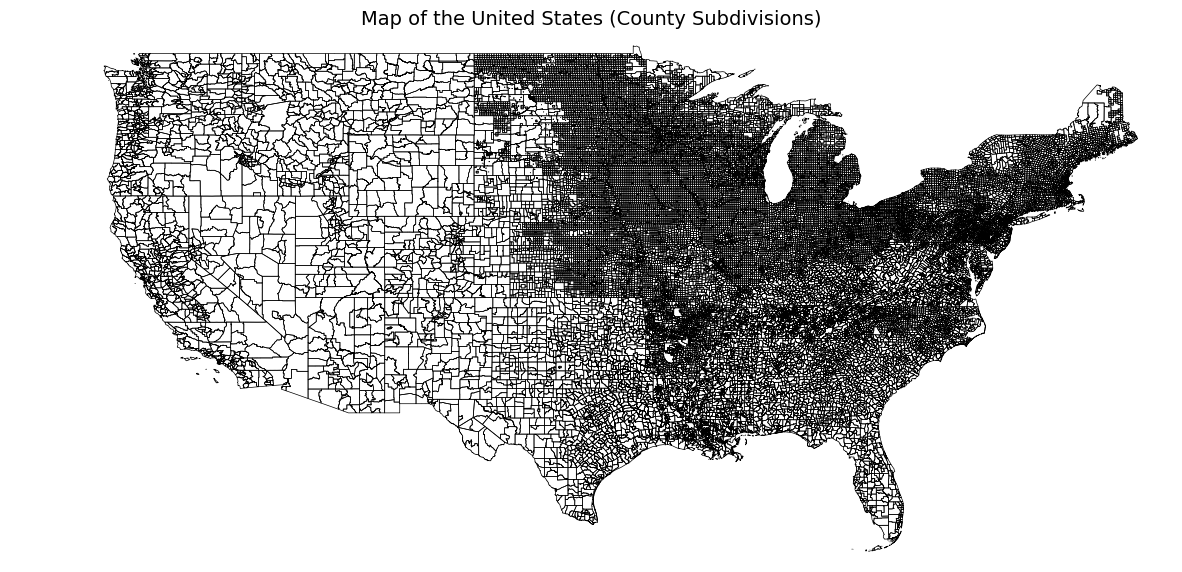

In [46]:
import matplotlib.pyplot as plt
import geopandas as gdp

# Load data
gdf = gpd.read_file('data/cb_2020_us_cousub_500k.shp')
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the boundaries
gdf.boundary.plot(ax=ax, linewidth=0.5, color='black')
ax.set_xlim([-130, -65])
ax.set_ylim([24, 50])

ax.set_title("Map of the United States (County Subdivisions)", fontsize=14)
ax.axis('off')

plt.show()

In [39]:
gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [51]:
# Snippets
gdf['land_sqkm'] = gdf['ALAND'] / 1e6
gdf['water_sqkm'] = gdf['AWATER'] / 1e6
gdf['water_pct'] = gdf['water_sqkm'] / (gdf['land_sqkm'] + gdf['water_sqkm']) * 100

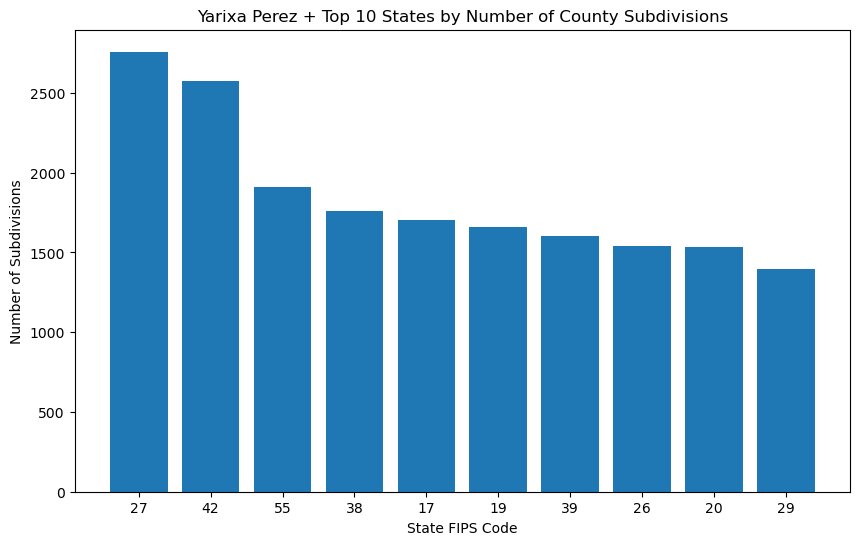

In [52]:
# 1) Top 10 states by number of county subdivisions
import matplotlib.pyplot as plt

state_counts = (
    gdf['STATEFP']
    .value_counts()
    .rename_axis('STATEFP')
    .reset_index(name='count')
)

plt.figure(figsize=(10,6))
plt.bar(state_counts['STATEFP'].head(10), state_counts['count'].head(10))
plt.xlabel('State FIPS Code')
plt.ylabel('Number of Subdivisions')
plt.title('Yarixa Perez + Top 10 States by Number of County Subdivisions')
plt.savefig('yarixaPerez_stateSibdivisions.png')
plt.show()



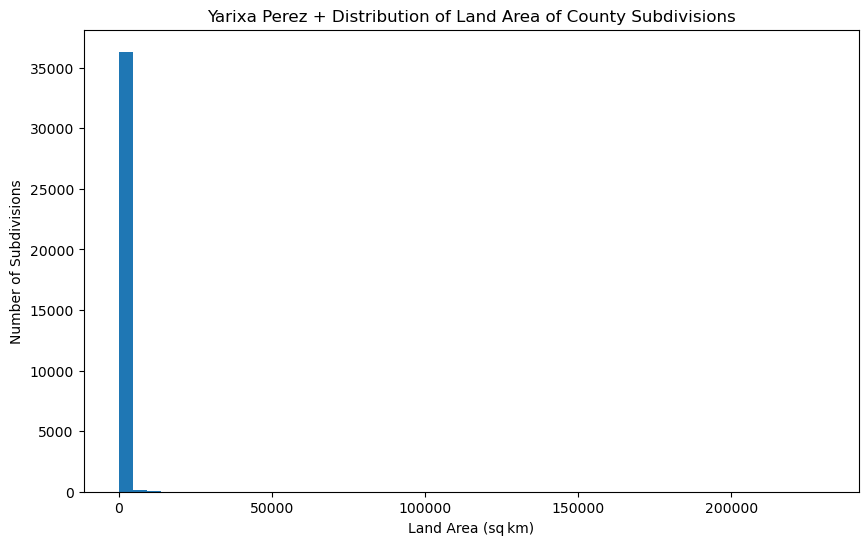

In [54]:
plt.figure(figsize=(10,6))
plt.hist(gdf['land_sqkm'], bins=50)
plt.xlabel('Land Area (sq km)')
plt.ylabel('Number of Subdivisions')
plt.title('Yarixa Perez + Distribution of Land Area of County Subdivisions')
plt.savefig('yarixaPerez_landDistribution.png')
plt.show()

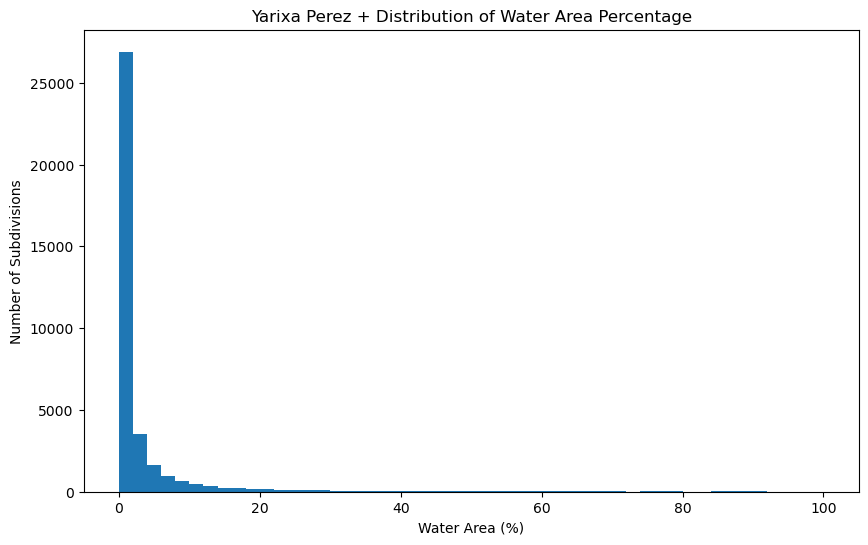

In [55]:
plt.figure(figsize=(10,6))
plt.hist(gdf['water_pct'].dropna(), bins=50)
plt.xlabel('Water Area (%)')
plt.ylabel('Number of Subdivisions')
plt.title('Yarixa Perez + Distribution of Water Area Percentage')
plt.savefig('yarixaPerez_landAreaDistribution.png')
plt.show()


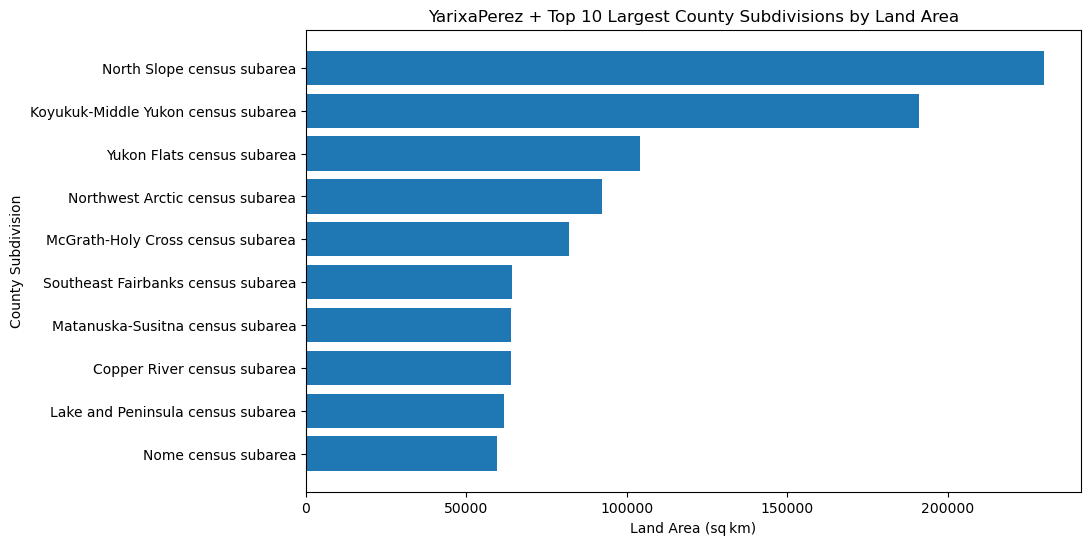

In [56]:
largest = (
    gdf[['NAMELSAD', 'land_sqkm']]
    .nlargest(10, 'land_sqkm')
)

plt.figure(figsize=(10,6))
plt.barh(largest['NAMELSAD'], largest['land_sqkm'])
plt.xlabel('Land Area (sq km)')
plt.ylabel('County Subdivision')
plt.title('YarixaPerez + Top 10 Largest County Subdivisions by Land Area')
plt.gca().invert_yaxis()
plt.savefig('yarixaPerez_largestSubdivisions.png')
plt.show()


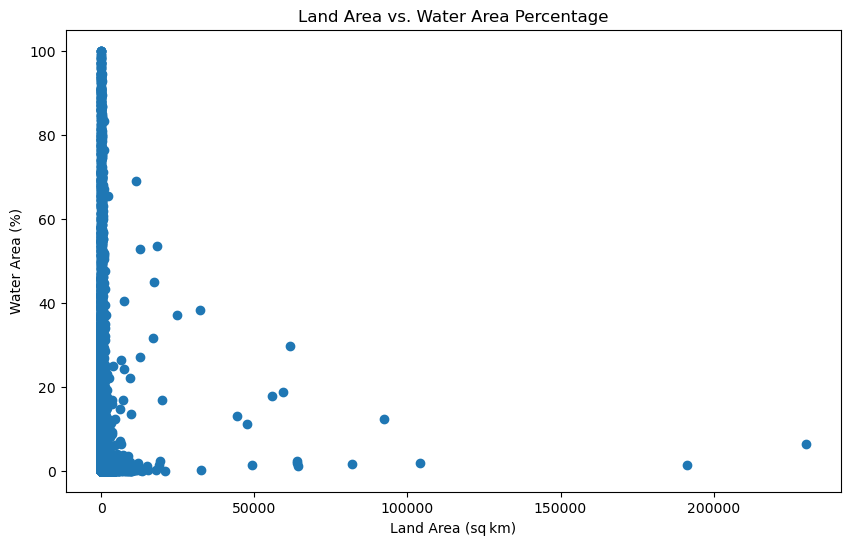

In [57]:
# 5) Land area vs. water percentage scatter
plt.figure(figsize=(10,6))
plt.scatter(gdf['land_sqkm'], gdf['water_pct'])
plt.xlabel('Land Area (sq km)')
plt.ylabel('Water Area (%)')
plt.title('Land Area vs. Water Area Percentage')
plt.savefig('yarixaPerez_landAreaVSWaterArea.png')
plt.show()
